<a href="https://colab.research.google.com/github/Priyankamadineni999/ML_Algorithms/blob/main/MultiLinear_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline



In [7]:
df_index=pd.read_csv("economic_index.csv")

In [8]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [13]:
#drop unnecceraray columns
df_index.drop(columns=["Unnamed: 0","month","year"],axis=1,inplace=True)

In [15]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [16]:
#chec null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

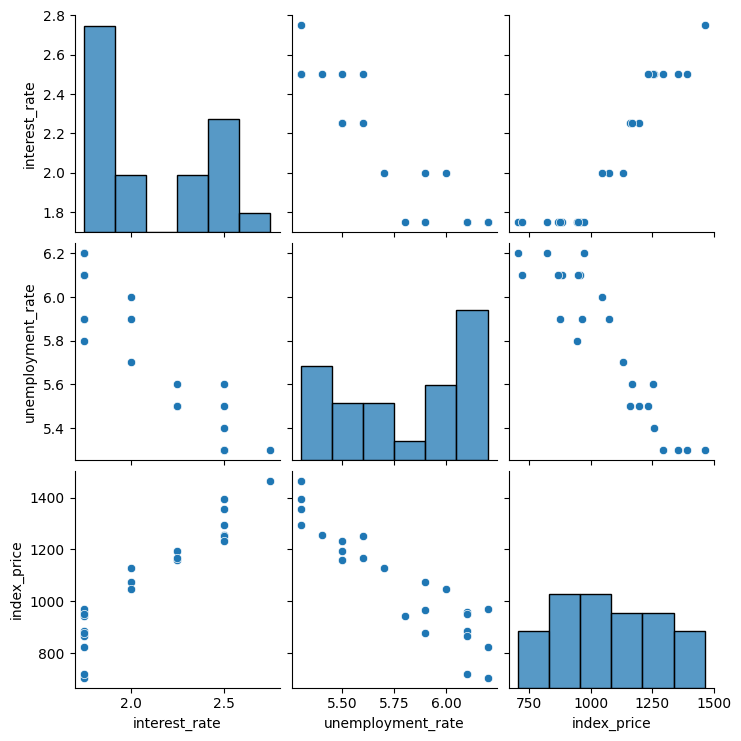

In [17]:
#visualizaion
import seaborn as sns
sns.pairplot(df_index)

In [18]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


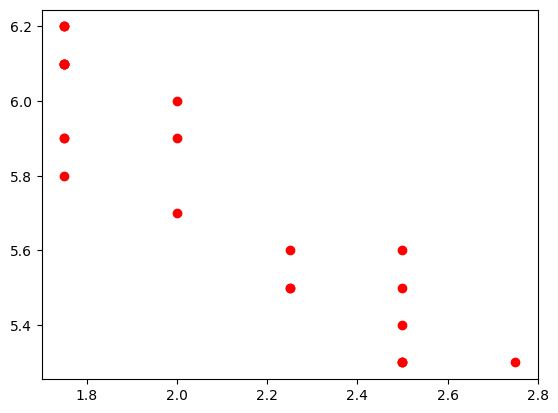

In [20]:
#visualize datapoins more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')

Text(0.5, 0, 'interest_rate')

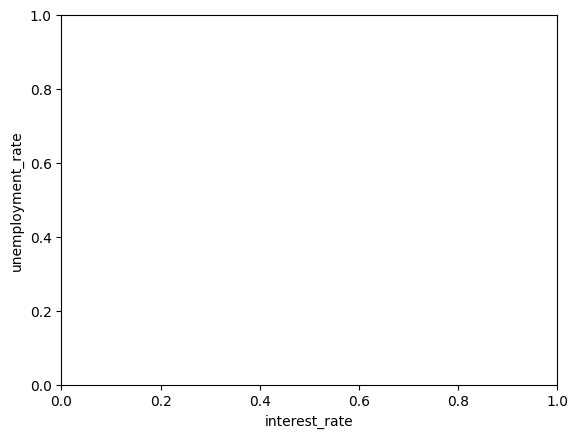

In [23]:
plt.ylabel("unemployment_rate")
plt.xlabel("interest_rate")


In [29]:
#independent and dependent features
x=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']

In [36]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [52]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [53]:
import seaborn as sns

In [56]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

TypeError: ignored

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

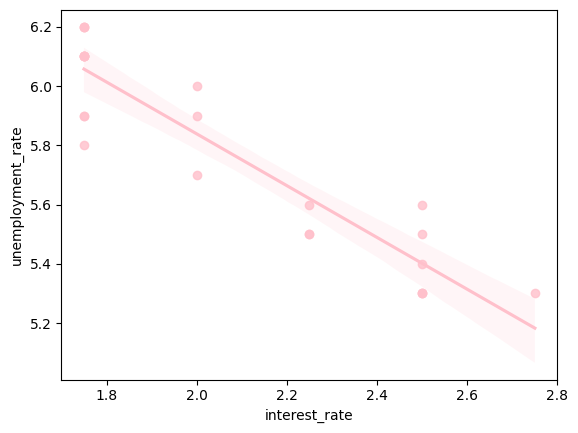

In [62]:
sns.regplot(data=df_index, x="interest_rate", y="unemployment_rate",color='pink')

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [66]:
x_train

array([[-0.93508297,  1.25108648],
       [-0.93508297,  0.31277162],
       [-0.93508297,  1.25108648],
       [-0.93508297,  0.93831486],
       [ 1.99213329, -1.56385811],
       [ 0.52852516, -0.62554324],
       [-0.93508297,  0.31277162],
       [-0.20327891,  0.31277162],
       [ 1.26032922, -1.56385811],
       [-0.93508297,  0.93831486],
       [-0.20327891, -0.31277162],
       [-0.93508297,  1.25108648],
       [-0.20327891,  0.62554324],
       [ 1.26032922, -1.56385811],
       [-0.93508297,  0.93831486],
       [ 1.26032922, -0.62554324],
       [ 0.52852516, -0.93831486],
       [ 1.26032922, -0.93831486]])

In [67]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [69]:
regression.fit(x_train,y_train)

LinearRegression()

In [72]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [73]:
np.mean(validation_score)

-4671.892144033939

In [75]:
#prediction
y_pred=regression.predict(x_test)

In [76]:
y_pred

array([ 856.05159457, 1314.13334002,  937.20809487,  856.05159457,
       1179.47420271, 1287.08117325])

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [78]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5405.490992395733
56.53565684621816
73.52204426153922


In [79]:
##display r2 and adjusted r2
from sklearn.metrics import r2_score

In [80]:
score=r2_score(y_test,y_pred)
print(score)

0.8827566637147143


In [81]:
print(1-(1-score)*len(y_test)-x_test.shape[1]-1)

-2.7034600177117145


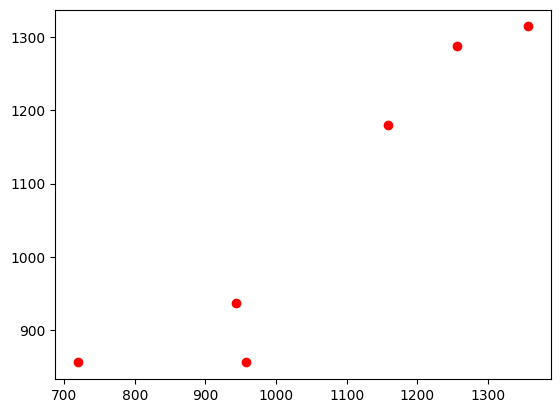

In [83]:
##Assumptions
plt.scatter(y_test,y_pred,color='red')

In [85]:
residuals=y_test-y_pred
print(residuals)

15    101.948405
2      42.866660
14      5.791905
23   -137.051595
8     -20.474203
4     -31.081173
Name: index_price, dtype: float64


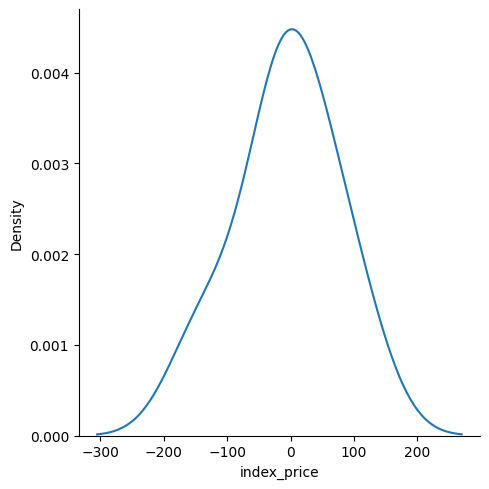

In [87]:
#plot this residuals
sns.displot(residuals,kind='kde')

In [88]:
print(regression.coef_)

[110.7119882  -86.96054954]


In [89]:
print(regression.intercept_)

1071.6666666666665


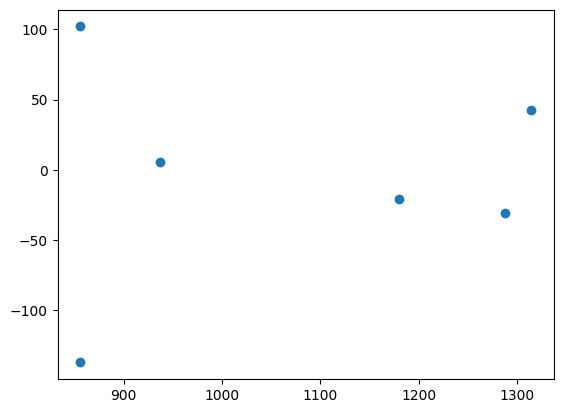

In [90]:
#scater plot with respect of predictions and residuals
plt.scatter(y_pred,residuals)

In [91]:
#OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [92]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):             -0.089
Method:                 Least Squares   F-statistic:                             0.2617
Date:                Mon, 25 Dec 2023   Prob (F-statistic):                       0.773
Time:                        08:27:17   Log-Likelihood:                         -151.16
No. Observations:                  18   AIC:                                      306.3
Df Residuals:                      16   BIC:                                      308.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           110.7120    721.519      0.153      0.880   -1418.840    1640.264
x2           -86.9605    721.519     -0.121      0.906   -1616.512    1442.591
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.031
Skew:                          -0.552   Prob(JB):                        0.597
Kurtosis:                       3.392   Cond. No.                         5.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""